# Titanic Data Analysis

The data set which I am going to explore contains the information gathered from 891 of the 2224 passengers and crew on board the Titanic. The Data set has various columns like 
- Survival
- Pclass(Ticket class)
- Sex
- Age
- Sibsp(# of siblings / spouses aboard the Titanic)
- Parch(# of parents / children aboard the Titanic)
- Ticket(Ticket Number)
- Fare
- Cabin(cabin Number)
- Embarked (port of Embarkation).   

## Loading Data From Csv

For importing data from csv, pandas has a built in function which reads the information into a dataframe. 

In [1]:
import pandas as pd

titanic_data = pd.read_csv('titanic_data.csv')
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Overall Metrics

The information has a column called 'survived' whose values are either 0 or 1, using this column we can count the total number of deaths and survivors.

In [2]:
total_no_passengers = len(titanic_data['Survived'])
survivied = titanic_data['Survived'].sum()
deaths = total_no_passengers - survivied

print('Total number of passengers on board: ',total_no_passengers)
print('Total number of survivors: ',survivied)
print('Total number of deaths: ',deaths)

Total number of passengers on board:  891
Total number of survivors:  342
Total number of deaths:  549


- The following pie chart shows the distribution of survivors and deaths

Populating the interactive namespace from numpy and matplotlib


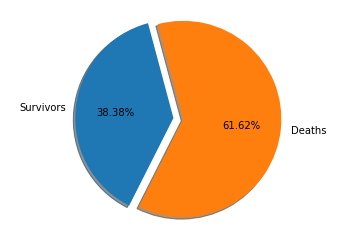

In [3]:
%pylab inline
import matplotlib.pyplot as plt

labels = 'Survivors', 'Deaths',
sizes  = [survivied,deaths]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.2f%%', shadow=True, startangle=105) 
plt.axis('equal')
plt.show()

## Overall Metrics By Gender

The above metrics show the total number of survivors and deaths, now let us explore these metrics based on the gender.
Using the groupby function on dataframe based on the gender, we can count the total number of female and male survivors. when we calulate female survivors and male survivors in terms of percentages with respect to total survivors  , we find that female survivors constitute (68.13%) and male survivors constitute (31.87%). Using this information, we can conclude that females where given more preference in using life saving materials like life boats, etc.



In [4]:
male_count = (titanic_data['Sex'] == 'male').sum()
female_count = (titanic_data['Sex'] == 'female').sum()
group_by_gender = titanic_data.groupby('Sex').sum()['Survived']
male_survivors = group_by_gender['male']
female_survivors = group_by_gender['female']
male_deaths = male_count - male_survivors
female_deaths = female_count - female_survivors

print('--------------------------------------')
print('Total number of males: ',male_count)
print('Total number of male survivors: ',male_survivors)
print('Total number of male deaths: ',male_deaths)
print('--------------------------------------')
print('Total number of females: ',female_count)
print('Total number of female survivors: ',female_survivors)
print('Total number of female deaths: ',female_deaths)
print('--------------------------------------')

--------------------------------------
Total number of males:  577
Total number of male survivors:  109
Total number of male deaths:  468
--------------------------------------
Total number of females:  314
Total number of female survivors:  233
Total number of female deaths:  81
--------------------------------------


- The following pie chart shows the distribution of male and female survivors

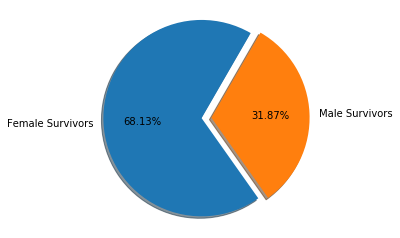

In [5]:
labels = 'Female Survivors', 'Male Survivors',
sizes  = [female_survivors,male_survivors]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.2f%%', shadow=True, startangle=60) 
plt.axis('equal')
plt.show()

## Explore survivors based on Pclass

Let us exlpore the survivors based on Pclass(A proxy for socio-economic status (SES), 1st = Upper, 2nd = Middle, 3rd = Lower) to see whether survivors were given priority based on their class.

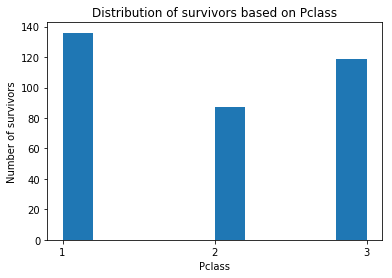

In [13]:
pclass = titanic_data['Pclass']
survived = (titanic_data['Survived'] == 1)
pclass_survived = pclass[survived]

plt.xticks(range(1,4))
plt.title('Distribution of survivors based on Pclass')
plt.xlabel('Pclass')
plt.ylabel('Number of survivors')
plt.hist(pclass_survived)
plt.show()

In [ ]:
- 